In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
import warnings
warnings.filterwarnings("ignore")

In [75]:
df=pd.read_csv("obesity.csv")
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

# Data Statistics

In [76]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [77]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Data Transformation

In [78]:
column_name_mapping = {
    'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'Family_History',
    'FAVC': 'High_Caloric_Food_Frequency',
    'FCVC': 'Vegetable_Consumption',
    'NCP': 'Daily_Meals',
    'CAEC': 'Food_Between_Meals',
    'SMOKE': 'Smoking_Habit',
    'CH2O': 'Daily_Water_Consumption',
    'SCC': 'Calorie_Monitoring',
    'FAF': 'Physical_Activity_Frequency',
    'TUE': 'Screen_Time',
    'CALC': 'Alcohol_Consumption',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'Obesity_Level'
}
df.rename(columns=column_name_mapping, inplace=True)
df_rounded = df.round(2)
df = df_rounded
df

Gender    Age  Height  Weight Family_History  \
0     Female  21.00    1.62   64.00            yes   
1     Female  21.00    1.52   56.00            yes   
2       Male  23.00    1.80   77.00            yes   
3       Male  27.00    1.80   87.00             no   
4       Male  22.00    1.78   89.80             no   
...      ...    ...     ...     ...            ...   
2106  Female  20.98    1.71  131.41            yes   
2107  Female  21.98    1.75  133.74            yes   
2108  Female  22.52    1.75  133.69            yes   
2109  Female  24.36    1.74  133.35            yes   
2110  Female  23.66    1.74  133.47            yes   

     High_Caloric_Food_Frequency  Vegetable_Consumption  Daily_Meals  \
0                             no                    2.0          3.0   
1                             no                    3.0          3.0   
2                             no                    2.0          3.0   
3                             no                    3.0          3.0   
4                             no                    2.0          1.0   
...                          ...                    ...          ...   
2106                         yes                    3.0          3.0   
2107                         yes                    3.0          3.0   
2108                         yes                    3.0          3.0   
2109                         yes                    3.0          3.0   
2110                         yes                    3.0          3.0   

     Food_Between_Meals Smoking_Habit  Daily_Water_Consumption  \
0             Sometimes            no                     2.00   
1             Sometimes           yes                     3.00   
2             Sometimes            no                     2.00   
3             Sometimes            no                     2.00   
4             Sometimes            no                     2.00   
...                 ...           ...                      ...   
2106          Sometimes            no                     1.73   
2107          Sometimes            no                     2.01   
2108          Sometimes            no                     2.05   
2109          Sometimes            no                     2.85   
2110          Sometimes            no                     2.86   

     Calorie_Monitoring  Physical_Activity_Frequency  Screen_Time  \
0                    no                         0.00         1.00   
1                   yes                         3.00         0.00   
2                    no                         2.00         1.00   
3                    no                         2.00         0.00   
4                    no                         0.00         0.00   
...                 ...                          ...          ...   
2106                 no                         1.68         0.91   
2107                 no                         1.34         0.60   
2108                 no                         1.41         0.65   
2109                 no                         1.14         0.59   
2110                 no                         1.03         0.71   

     Alcohol_Consumption         Transportation        Obesity_Level  
0                     no  Public_Transportation        Normal_Weight  
1              Sometimes  Public_Transportation        Normal_Weight  
2             Frequently  Public_Transportation        Normal_Weight  
3             Frequently                Walking   Overweight_Level_I  
4              Sometimes  Public_Transportation  Overweight_Level_II  
...                  ...                    ...                  ...  
2106           Sometimes  Public_Transportation     Obesity_Type_III  
2107           Sometimes  Public_Transportation     Obesity_Type_III  
2108           Sometimes  Public_Transportation     Obesity_Type_III  
2109           Sometimes  Public_Transportation     Obesity_Type_III  
2110           Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 c

# Data Cleaning

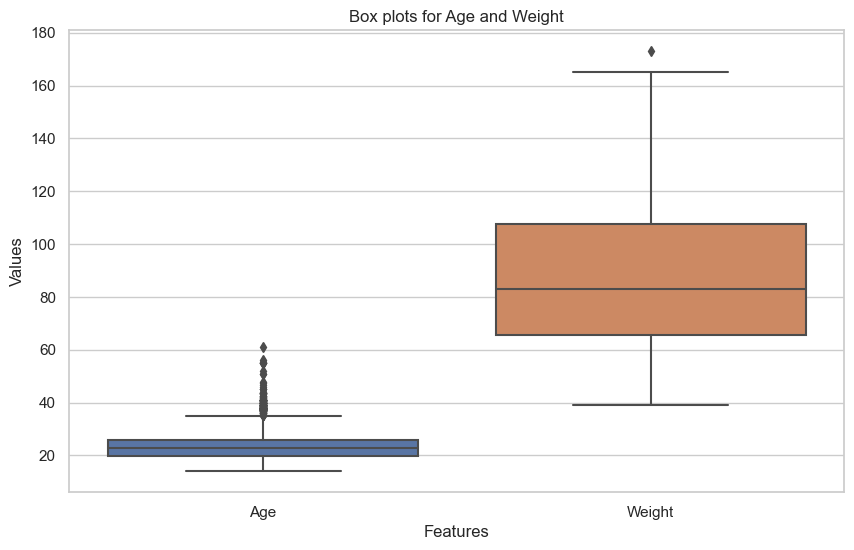

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age','Weight']])
plt.title('Box plots for Age and Weight')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [80]:
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

Q1_weight = df['Weight'].quantile(0.25)
Q3_weight = df['Weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

lower_weight = Q1_weight - 1.5 * IQR_weight
upper_weight = Q3_weight + 1.5 * IQR_weight

outliers_age = df[(df['Age'] < lower_age) | (df['Age'] > upper_age)].index
outliers_weight = df[(df['Weight'] < lower_weight) | (df['Weight'] > upper_weight)].index

outliers1 = outliers_age.union(outliers_weight)
df_cleaned = df.drop(index=outliers1)

print("New Shape after removing outliers: ", df_cleaned.shape)


New Shape after removing outliers:  (1942, 17)


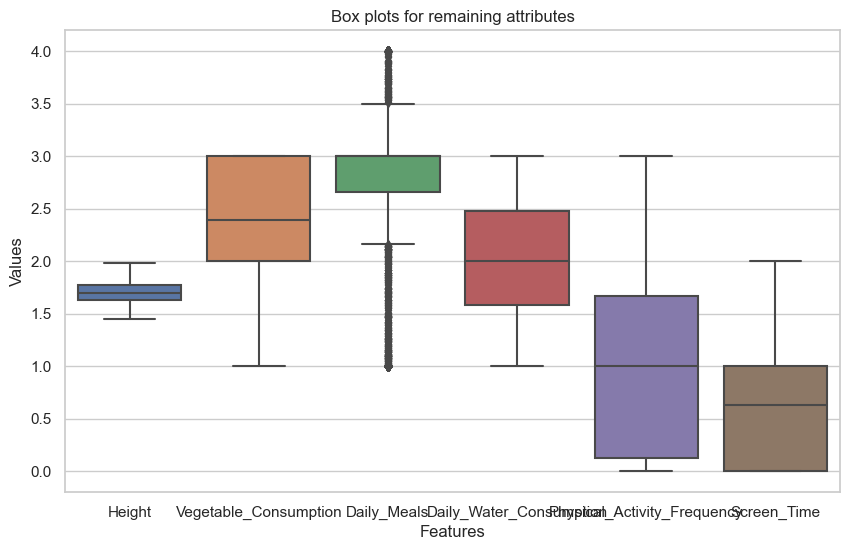

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Height','Vegetable_Consumption','Daily_Meals','Daily_Water_Consumption',
                     'Physical_Activity_Frequency','Screen_Time']])
plt.title('Box plots for remaining attributes')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [82]:
Q1_height = df_cleaned['Height'].quantile(0.25)
Q3_height = df_cleaned['Height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

lower_height = Q1_height - 1.5 * IQR_height
upper_height = Q3_height + 1.5 * IQR_height


Q1_meals = df_cleaned['Daily_Meals'].quantile(0.25)
Q3_meals = df_cleaned['Daily_Meals'].quantile(0.75)
IQR_meals = Q3_meals - Q1_meals

lower_meals = Q1_meals - 0.5 * IQR_meals
upper_meals = Q3_meals + 0.5 * IQR_meals


outliers_height = df_cleaned[(df_cleaned['Height'] < lower_height) | (df_cleaned['Height'] > upper_height)].index
outliers_meals = df_cleaned[(df_cleaned['Daily_Meals'] < lower_meals) | (df_cleaned['Daily_Meals'] > upper_meals)].index

outliers2 =outliers_height.union(outliers_meals)
data = df_cleaned.drop(index=outliers2)

print("New Shape after removing outliers: ", data.shape)

New Shape after removing outliers:  (1300, 17)


# Feature Engineering

In [83]:
data['BMI'] = data['Weight'] / (data['Height'] ** 2)
data

Gender    Age  Height  Weight Family_History  \
0     Female  21.00    1.62   64.00            yes   
1     Female  21.00    1.52   56.00            yes   
2       Male  23.00    1.80   77.00            yes   
3       Male  27.00    1.80   87.00             no   
5       Male  29.00    1.62   53.00             no   
...      ...    ...     ...     ...            ...   
2106  Female  20.98    1.71  131.41            yes   
2107  Female  21.98    1.75  133.74            yes   
2108  Female  22.52    1.75  133.69            yes   
2109  Female  24.36    1.74  133.35            yes   
2110  Female  23.66    1.74  133.47            yes   

     High_Caloric_Food_Frequency  Vegetable_Consumption  Daily_Meals  \
0                             no                    2.0          3.0   
1                             no                    3.0          3.0   
2                             no                    2.0          3.0   
3                             no                    3.0          3.0   
5                            yes                    2.0          3.0   
...                          ...                    ...          ...   
2106                         yes                    3.0          3.0   
2107                         yes                    3.0          3.0   
2108                         yes                    3.0          3.0   
2109                         yes                    3.0          3.0   
2110                         yes                    3.0          3.0   

     Food_Between_Meals Smoking_Habit  Daily_Water_Consumption  \
0             Sometimes            no                     2.00   
1             Sometimes           yes                     3.00   
2             Sometimes            no                     2.00   
3             Sometimes            no                     2.00   
5             Sometimes            no                     2.00   
...                 ...           ...                      ...   
2106          Sometimes            no                     1.73   
2107          Sometimes            no                     2.01   
2108          Sometimes            no                     2.05   
2109          Sometimes            no                     2.85   
2110          Sometimes            no                     2.86   

     Calorie_Monitoring  Physical_Activity_Frequency  Screen_Time  \
0                    no                         0.00         1.00   
1                   yes                         3.00         0.00   
2                    no                         2.00         1.00   
3                    no                         2.00         0.00   
5                    no                         0.00         0.00   
...                 ...                          ...          ...   
2106                 no                         1.68         0.91   
2107                 no                         1.34         0.60   
2108                 no                         1.41         0.65   
2109                 no                         1.14         0.59   
2110                 no                         1.03         0.71   

     Alcohol_Consumption         Transportation       Obesity_Level        BMI  
0                     no  Public_Transportation       Normal_Weight  24.386526  
1              Sometimes  Public_Transportation       Normal_Weight  24.238227  
2             Frequently  Public_Transportation       Normal_Weight  23.765432  
3             Frequently                Walking  Overweight_Level_I  26.851852  
5              Sometimes             Automobile       Normal_Weight  20.195092  
...                  ...                    ...                 ...        ...  
2106           Sometimes  Public_Transportation    Obesity_Type_III  44.940324  
2107           Sometimes  Public_Transportation    Obesity_Type_III  43.670204  
2108           Sometimes  Public_Transportation    Obesity_Type_III  43.653878  
2109           Sometimes  Public_Transportation    Obesity_T

In [84]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Gender', 'Family_History', 'High_Caloric_Food_Frequency',
       'Food_Between_Meals', 'Smoking_Habit', 'Calorie_Monitoring',
       'Alcohol_Consumption', 'Transportation', 'Obesity_Level'],
      dtype='object')
Numerical Variables:
['Age', 'Height', 'Weight', 'Vegetable_Consumption', 'Daily_Meals', 'Daily_Water_Consumption', 'Physical_Activity_Frequency', 'Screen_Time', 'BMI']


# Exploratory Data Analysis

# Univariate Analysis

## Numerical columns

Age
Skew : 0.59


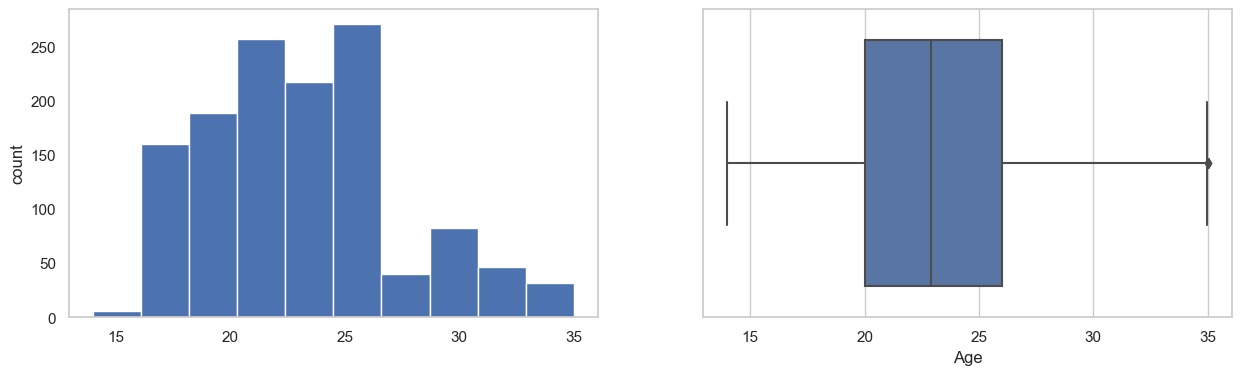

Height
Skew : -0.02


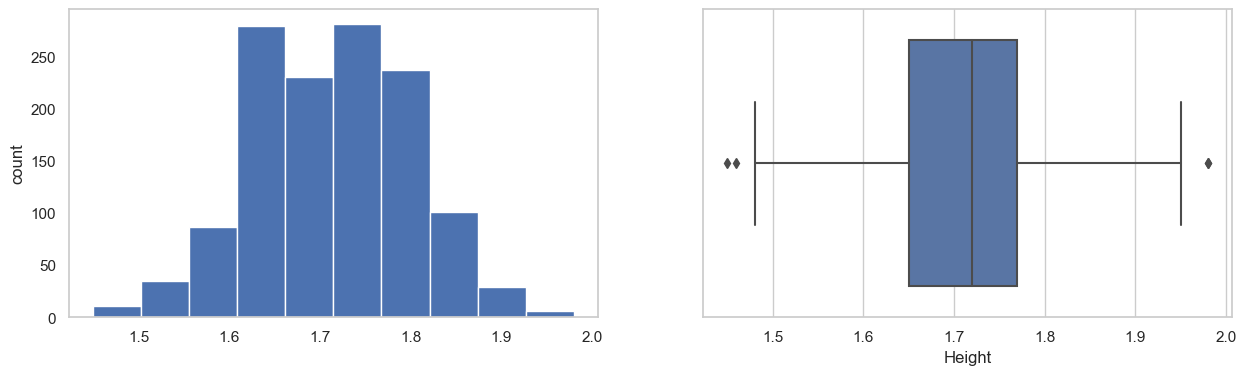

Weight
Skew : -0.02


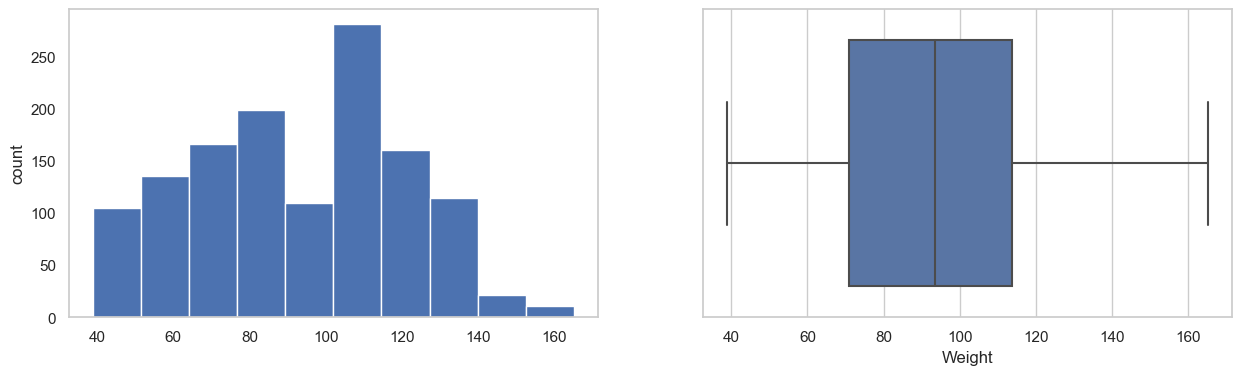

Vegetable_Consumption
Skew : -0.55


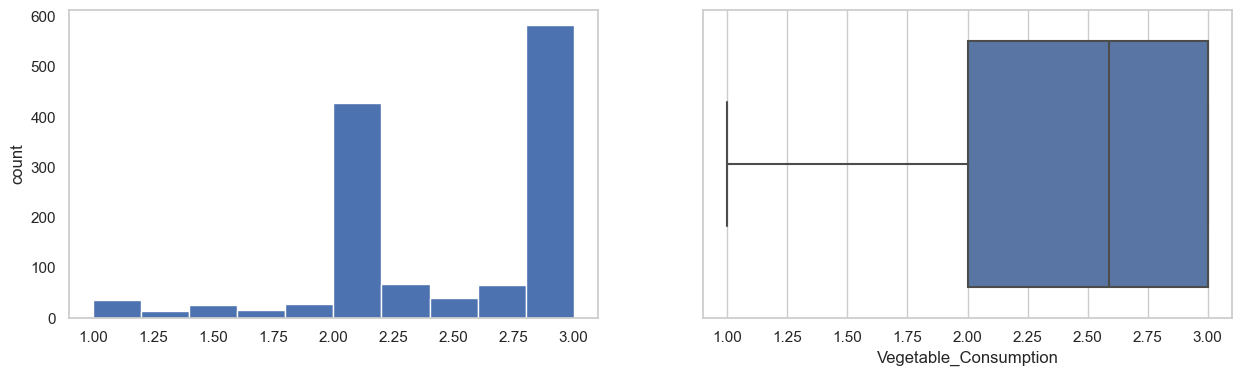

Daily_Meals
Skew : -3.5


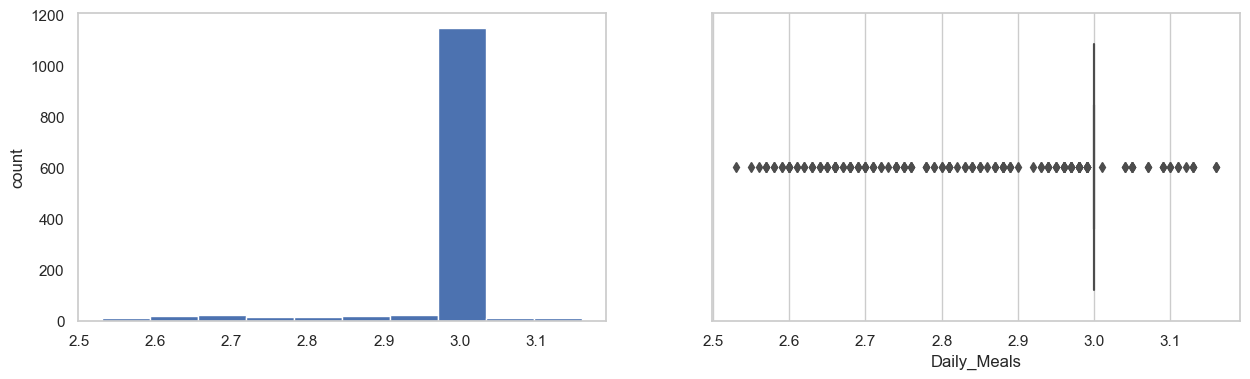

Daily_Water_Consumption
Skew : -0.23


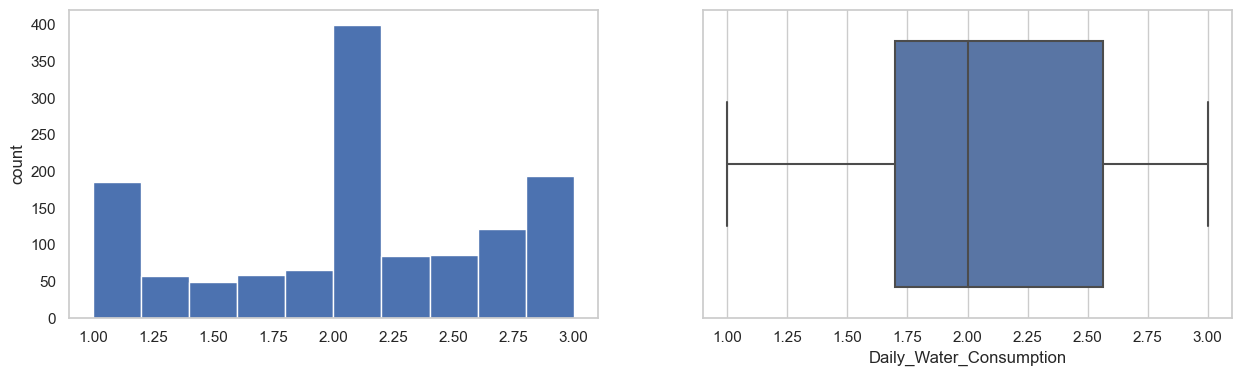

Physical_Activity_Frequency
Skew : 0.53


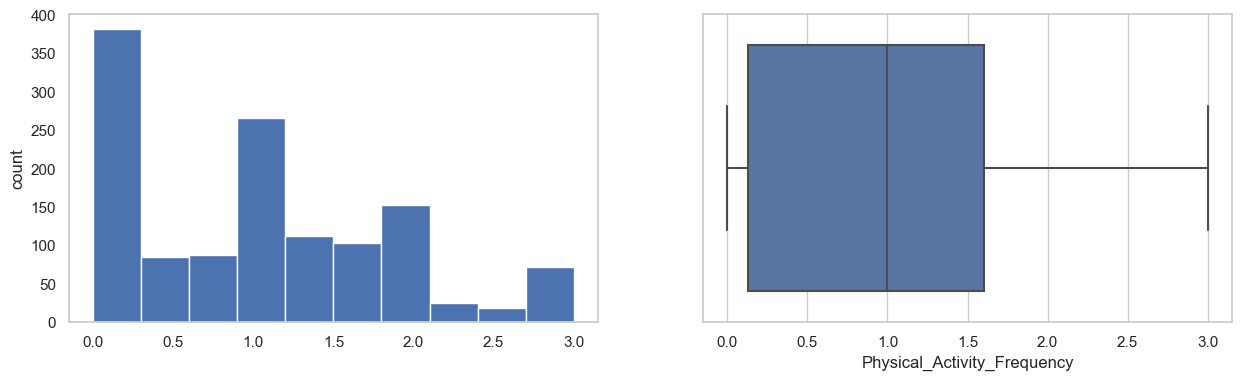

Screen_Time
Skew : 0.58


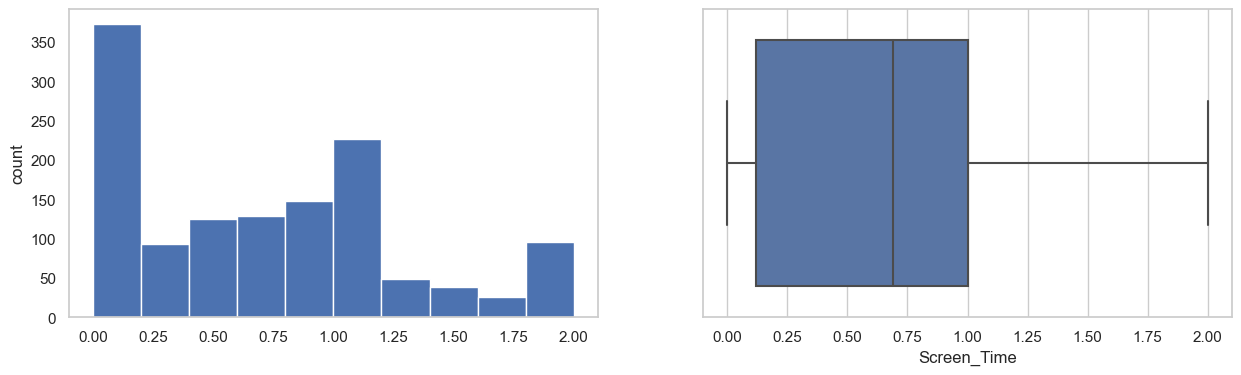

BMI
Skew : -0.04


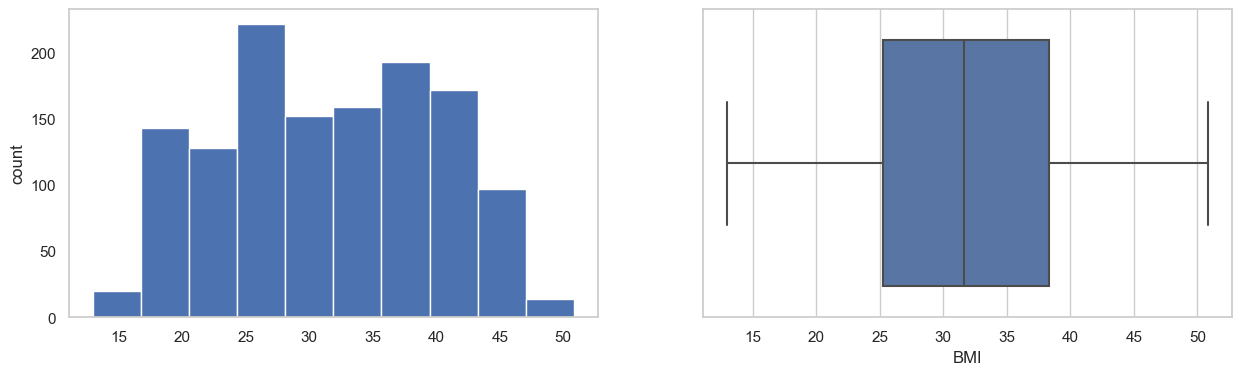

In [85]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

## Categorical columns

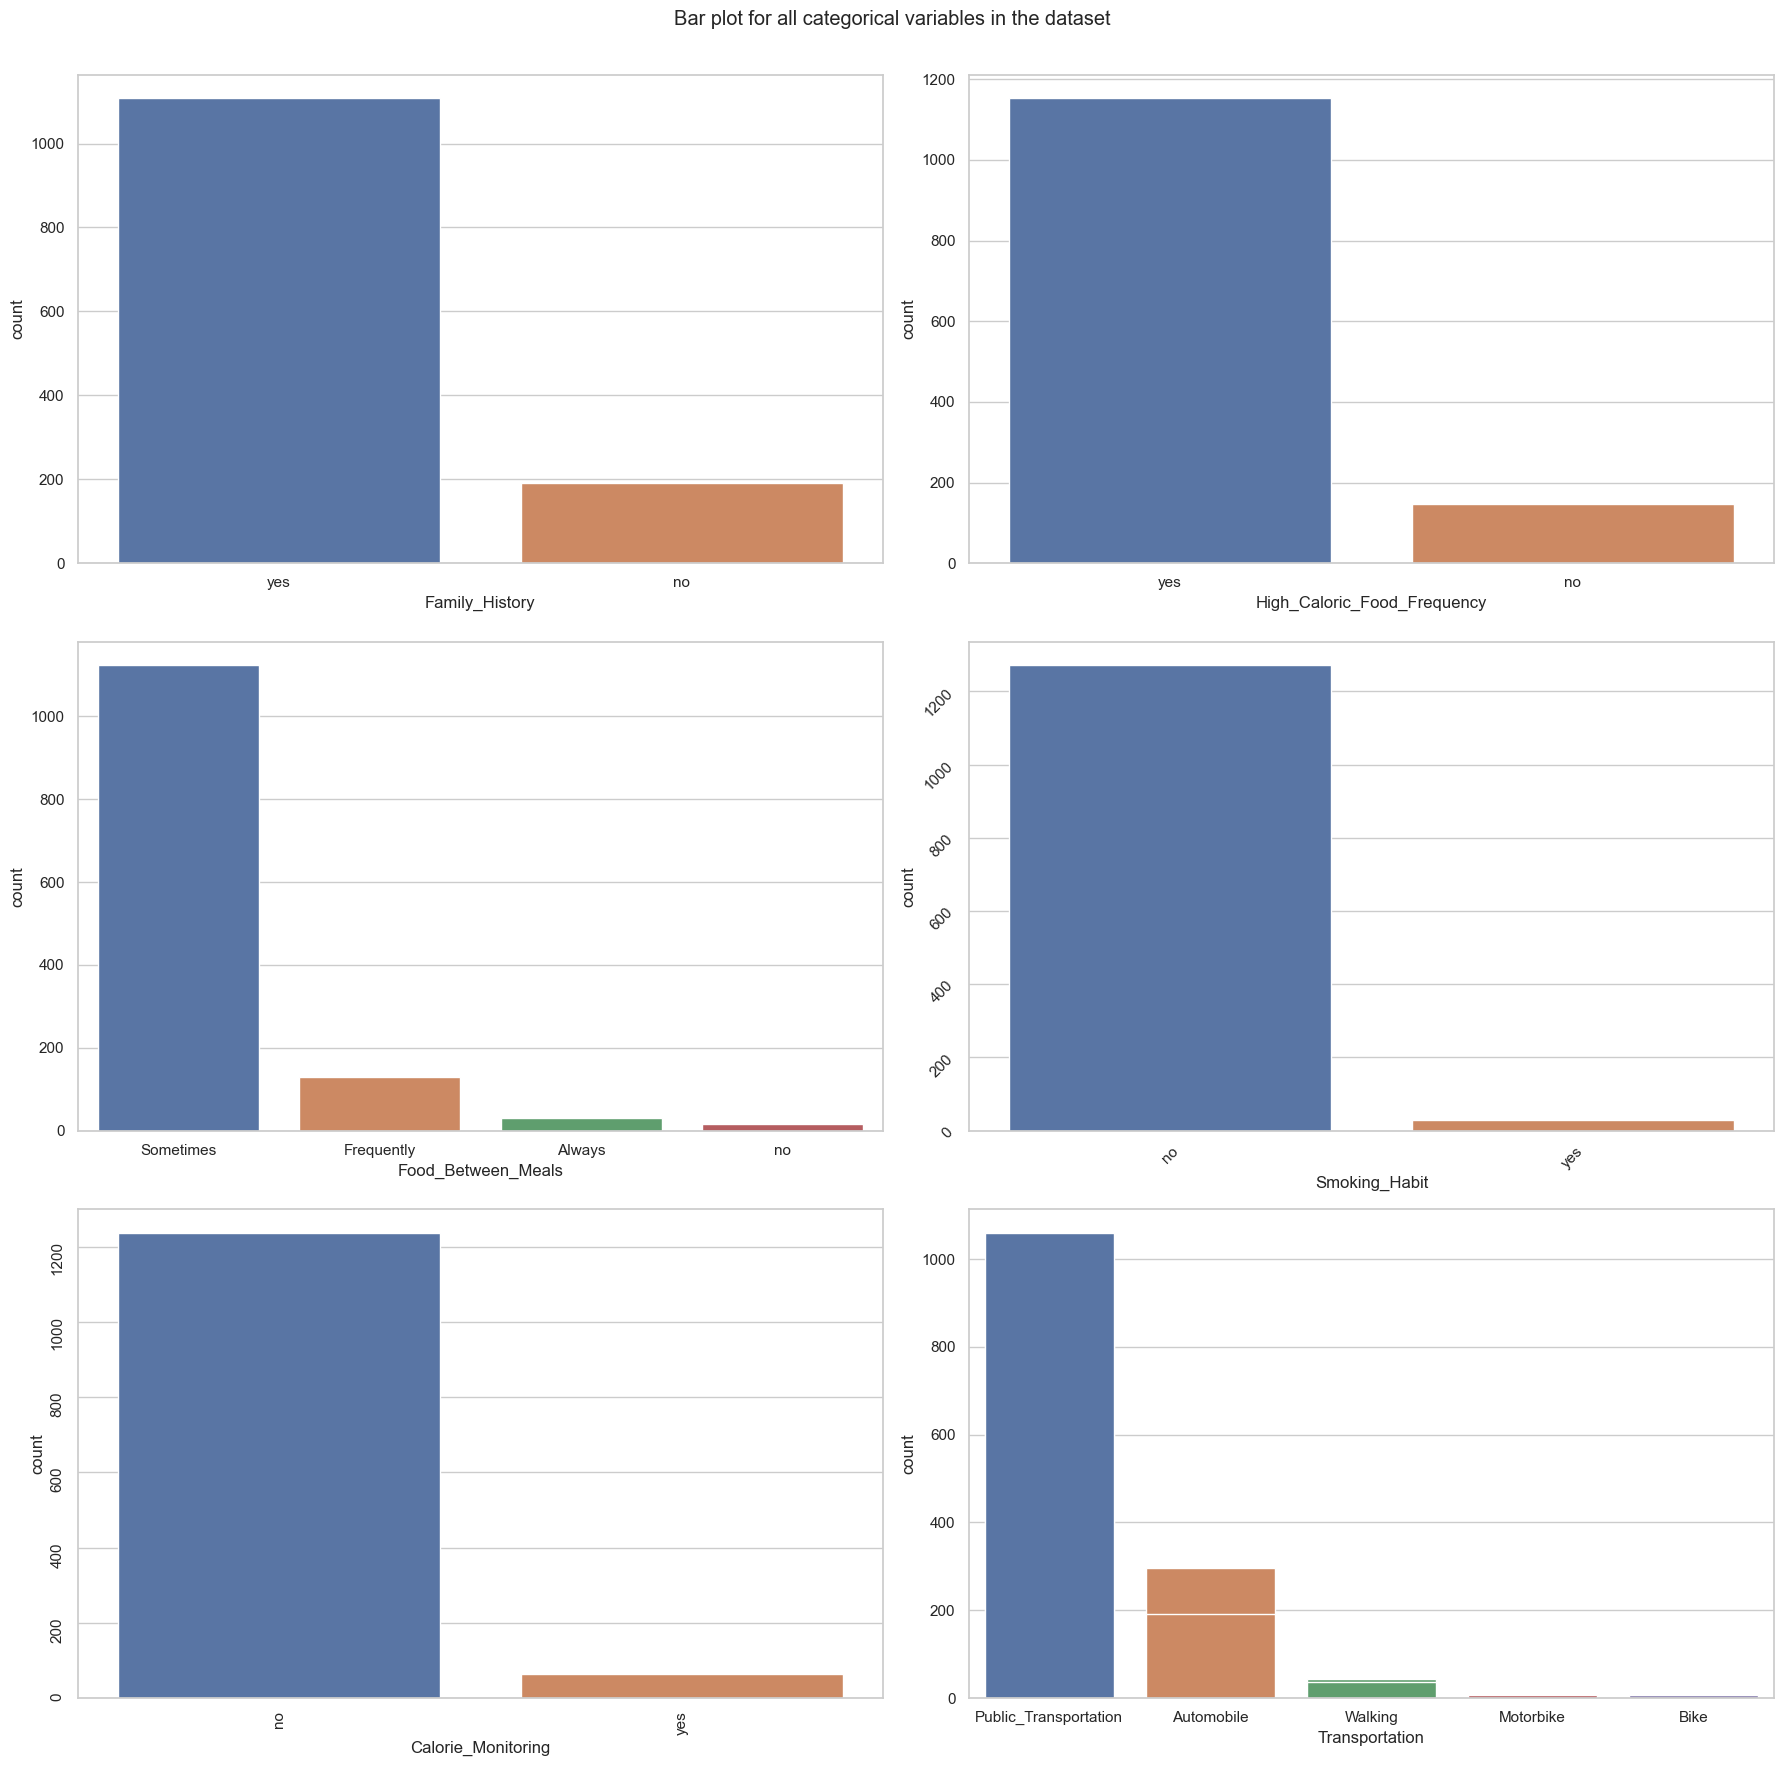

In [86]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset\n\n')

sns.countplot(ax=axes[0, 0], x='Family_History', data=data,
              order=data['Family_History'].value_counts().index);

sns.countplot(ax=axes[0, 1], x='High_Caloric_Food_Frequency', data=data,
              order=data['High_Caloric_Food_Frequency'].value_counts().index);

sns.countplot(ax=axes[1, 0], x='Food_Between_Meals', data=data,
              order=data['Food_Between_Meals'].value_counts().index);

sns.countplot(ax=axes[1, 1], x='Smoking_Habit', data=data,
              order=data['Smoking_Habit'].value_counts().index);

sns.countplot(ax=axes[2, 0], x='Calorie_Monitoring', data=data,
              order=data['Calorie_Monitoring'].value_counts().index);

sns.countplot(ax=axes[2, 1], x='Alcohol_Consumption', data=data,
              order=data['Alcohol_Consumption'].value_counts().index);

sns.countplot(ax=axes[2, 1], x='Transportation', data=data,
              order=data['Transportation'].value_counts().index);

axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=0)

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS

## Numerical columns

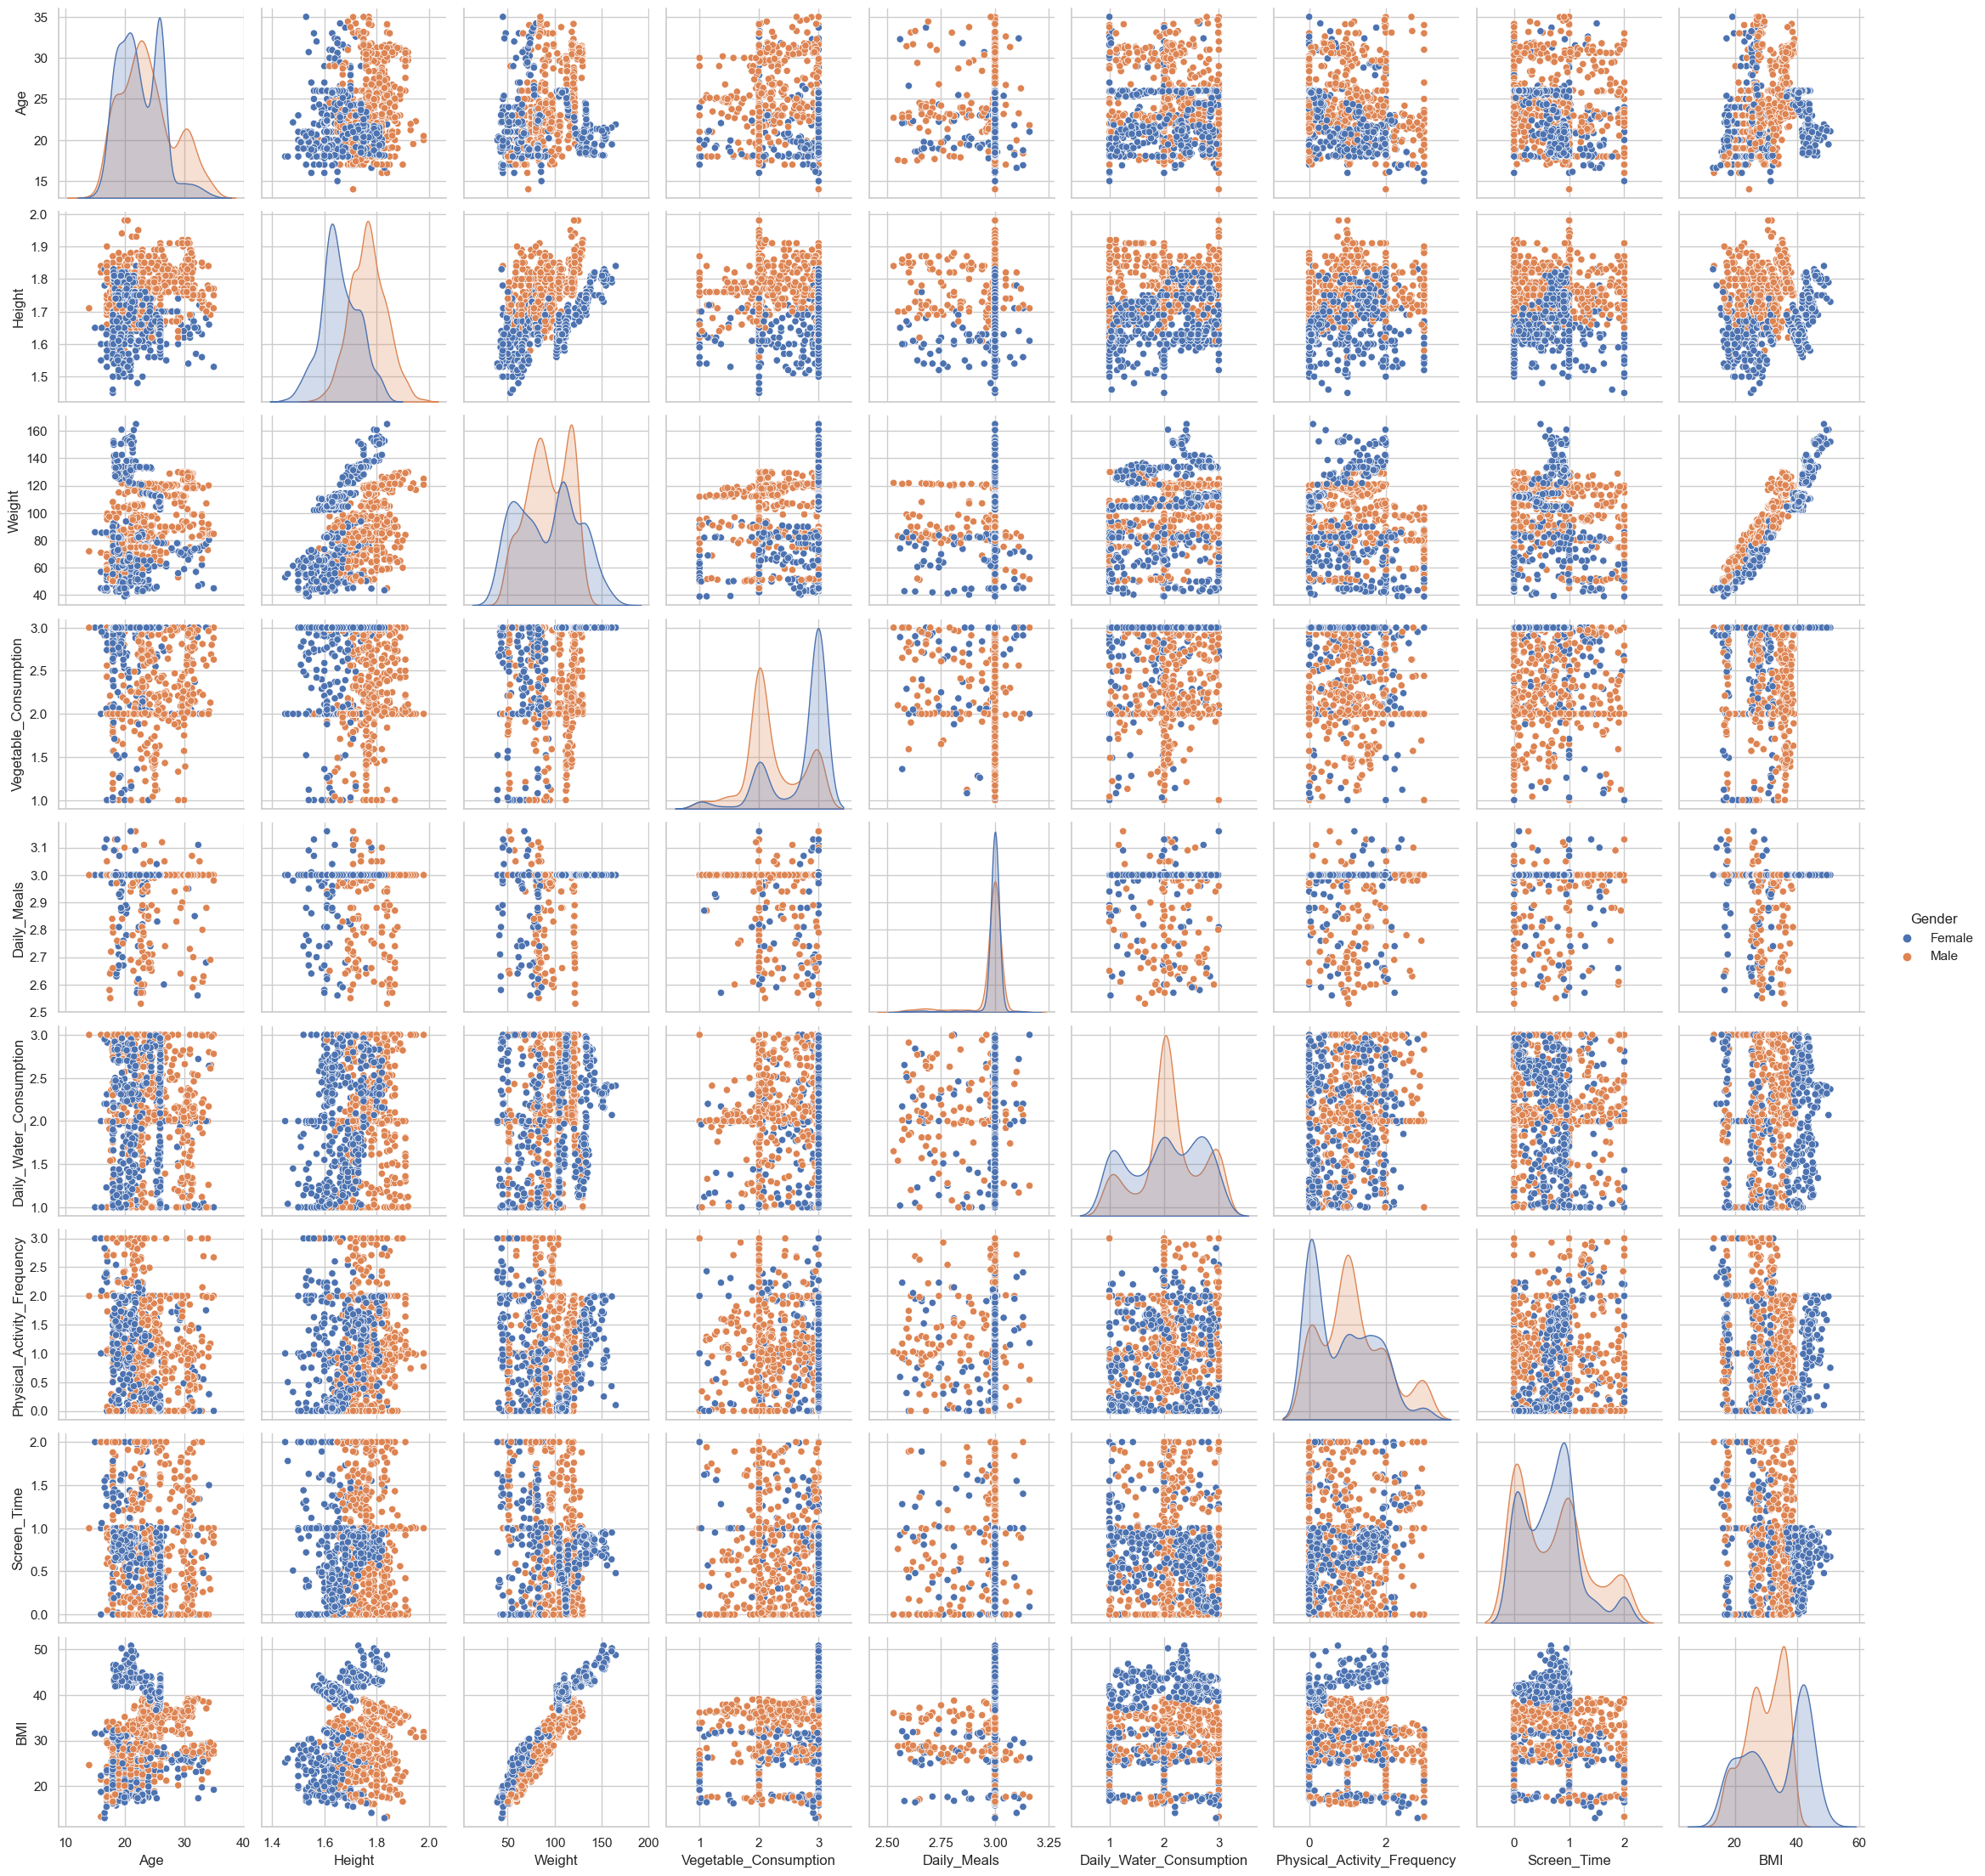

In [87]:
sns.pairplot(data, hue='Gender', diag_kind='kde')
plt.show()

### Categorical columns

In [88]:
cross_tabs = {}

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2 or (col1, col2) in cross_tabs or (col2, col1) in cross_tabs:
            continue
        cross_tab = pd.crosstab(df[col1], df[col2])
        cross_tabs[(col1, col2)] = cross_tab
for cols, cross_tab in cross_tabs.items():
    print(f"Cross-tabulation between {cols[0]} and {cols[1]}:")
    print(cross_tab)
    print("\n")

Cross-tabulation between Gender and Family_History:
Family_History   no  yes
Gender                  
Female          232  811
Male            153  915


Cross-tabulation between Gender and High_Caloric_Food_Frequency:
High_Caloric_Food_Frequency   no  yes
Gender                               
Female                       143  900
Male                         102  966


Cross-tabulation between Gender and Food_Between_Meals:
Food_Between_Meals  Always  Frequently  Sometimes  no
Gender                                               
Female                  23         161        844  15
Male                    30          81        921  36


Cross-tabulation between Gender and Smoking_Habit:
Smoking_Habit    no  yes
Gender                  
Female         1028   15
Male           1039   29


Cross-tabulation between Gender and Calorie_Monitoring:
Calorie_Monitoring    no  yes
Gender                       
Female               973   70
Male                1042   26


Cross-tabulation betwe

# MULTIVARIATE ANALYSIS

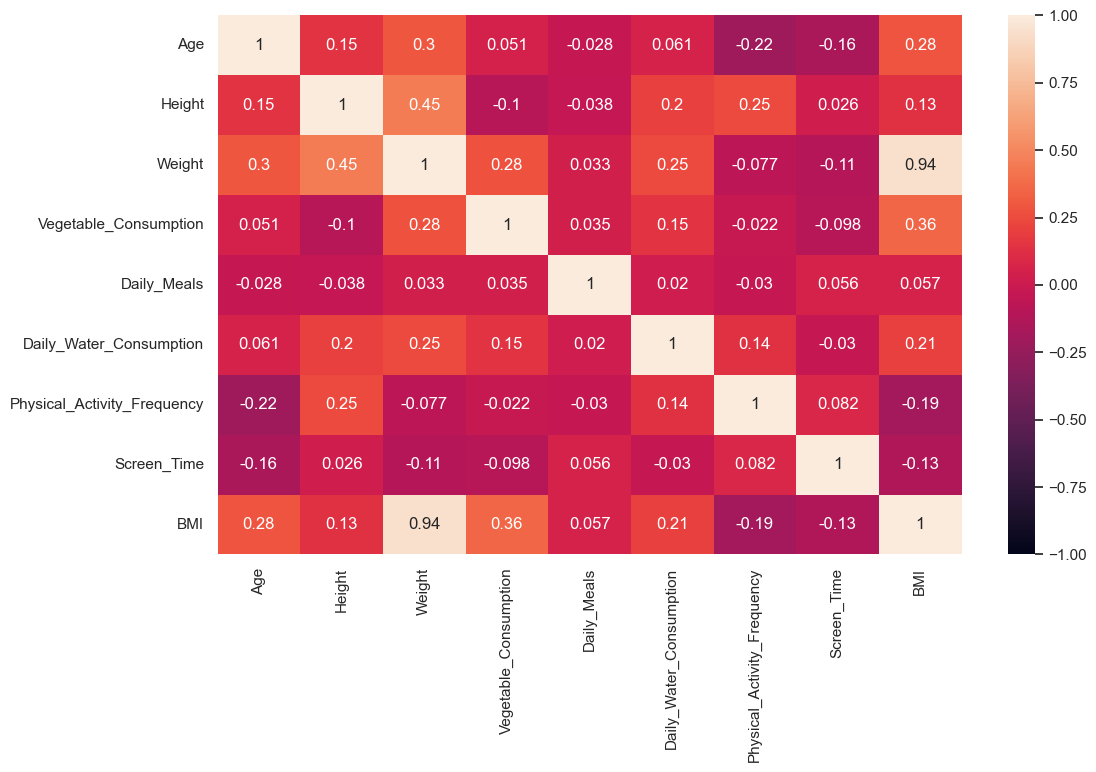

In [92]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot =True, vmin = -1, vmax = 1)
plt.show()

# Clustering 

## K-Means

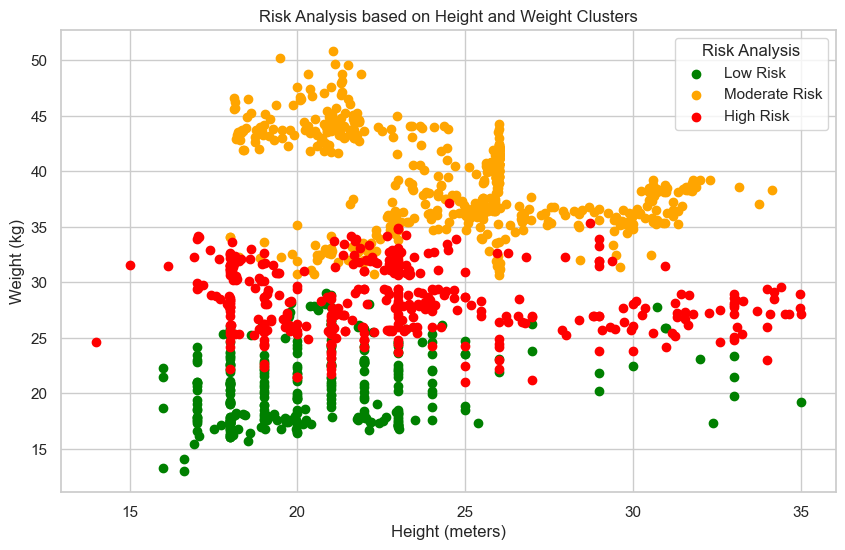

In [93]:
columns_for_clustering = ['Age','Height', 'Weight', 'Vegetable_Consumption', 'Daily_Meals', 'Daily_Water_Consumption', 
                          'Physical_Activity_Frequency', 'Screen_Time','BMI']

kmeans = KMeans(n_clusters=3, random_state=42)
data['Risk_Analysis'] = kmeans.fit_predict(data[columns_for_clustering])

def categorize_risk(cluster):
    if cluster == 0:
        return 'Low Risk'
    elif cluster == 1:
        return 'Moderate Risk'
    elif cluster == 2:
        return 'High Risk'

data['Risk_Analysis'] = data['Risk_Analysis'].apply(categorize_risk)

plt.figure(figsize=(10, 6))
colors = {'Low Risk': 'green', 'Moderate Risk': 'orange', 'High Risk': 'red'}
for category, color in colors.items():
    subset = data[data['Risk_Analysis'] == category]
    plt.scatter(subset['Age'], subset['BMI'], color=color, label=category)

plt.xlabel('Height (meters)')
plt.ylabel('Weight (kg)')
plt.title('Risk Analysis based on Height and Weight Clusters')
plt.legend(title='Risk Analysis')
plt.show()

# Classification

## Gaussian Naive Bayes

In [94]:
numerical_features = ['Age','Height','Weight', 'Vegetable_Consumption', 'Daily_Meals', 'Daily_Water_Consumption', 'Physical_Activity_Frequency', 'Screen_Time']

X = data[numerical_features]
y = data['Obesity_Level']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("GAUSSIAN NAIVE BAYES\n")
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


GAUSSIAN NAIVE BAYES

Accuracy: 0.6461538461538462
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.17      0.30        23
      Normal_Weight       0.36      0.83      0.50        36
     Obesity_Type_I       0.70      0.53      0.60        40
    Obesity_Type_II       0.91      0.98      0.94        42
   Obesity_Type_III       0.75      1.00      0.86        54
 Overweight_Level_I       0.43      0.12      0.19        24
Overweight_Level_II       0.79      0.37      0.50        41

           accuracy                           0.65       260
          macro avg       0.71      0.57      0.56       260
       weighted avg       0.71      0.65      0.62       260



## Random Forest

In [95]:
X = data.drop(['Risk_Analysis', 'Obesity_Level'], axis=1)
y = data['Obesity_Level']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("RANDOM FOREST\n")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

RANDOM FOREST

Accuracy: 0.9807692307692307

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        23
      Normal_Weight       0.90      1.00      0.95        36
     Obesity_Type_I       1.00      0.97      0.99        40
    Obesity_Type_II       1.00      1.00      1.00        42
   Obesity_Type_III       1.00      1.00      1.00        54
 Overweight_Level_I       0.96      0.96      0.96        24
Overweight_Level_II       1.00      0.95      0.97        41

           accuracy                           0.98       260
          macro avg       0.98      0.98      0.98       260
       weighted avg       0.98      0.98      0.98       260



In [20]:
new_tuple_values = {}

for column in X.columns:
    value = input(f"Enter value for '{column}': ")
    new_tuple_values[column] = value

new_tuple_df = pd.DataFrame(new_tuple_values, index=[0])

new_tuple_encoded = pd.get_dummies(new_tuple_df)

missing_features = set(X_encoded.columns) - set(new_tuple_encoded.columns)
for feature in missing_features:
    new_tuple_encoded[feature] = 0  

new_tuple_encoded = new_tuple_encoded[X_encoded.columns]

predicted_obesity_level = rf_classifier.predict(new_tuple_encoded)

print("Predicted Obesity Level:", predicted_obesity_level[0])

# Data visualizations

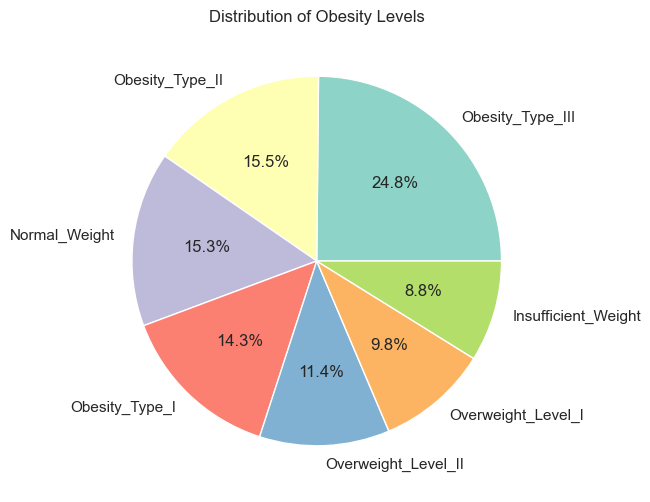

In [96]:
plt.figure(figsize=(8, 6))
data['Obesity_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Obesity Levels')
plt.ylabel('')
plt.show()


    Looking at the chart, it seems that the majority of the population falls under some category of overweight or obesity

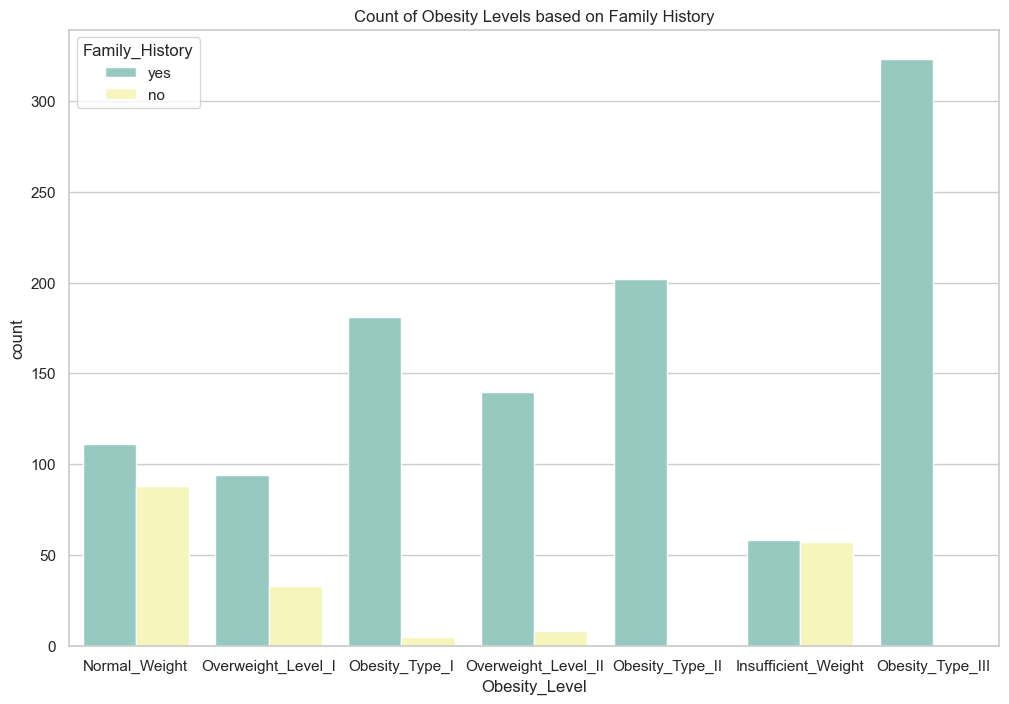

In [97]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Obesity_Level', hue='Family_History', data=data,palette='Set3')
plt.title('Count of Obesity Levels based on Family History')
plt.show()

    In conclusion, the graph suggests that there is a link between family history and obesity. This is likely due to a combination of genetic and environmental factors.

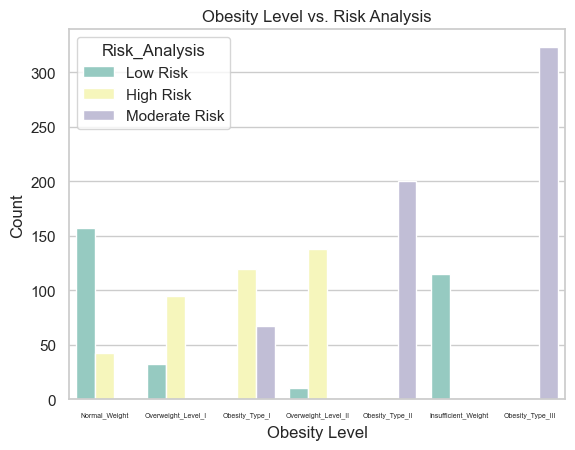

In [98]:
sns.countplot(x='Obesity_Level', hue='Risk_Analysis', data=data,palette='Set3')
plt.xticks(fontsize=5)
plt.title('Obesity Level vs. Risk Analysis')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

    The graph suggests that there is a high risk for overweight_Level_I,overweight_Level_II and overweight_Level_III people.

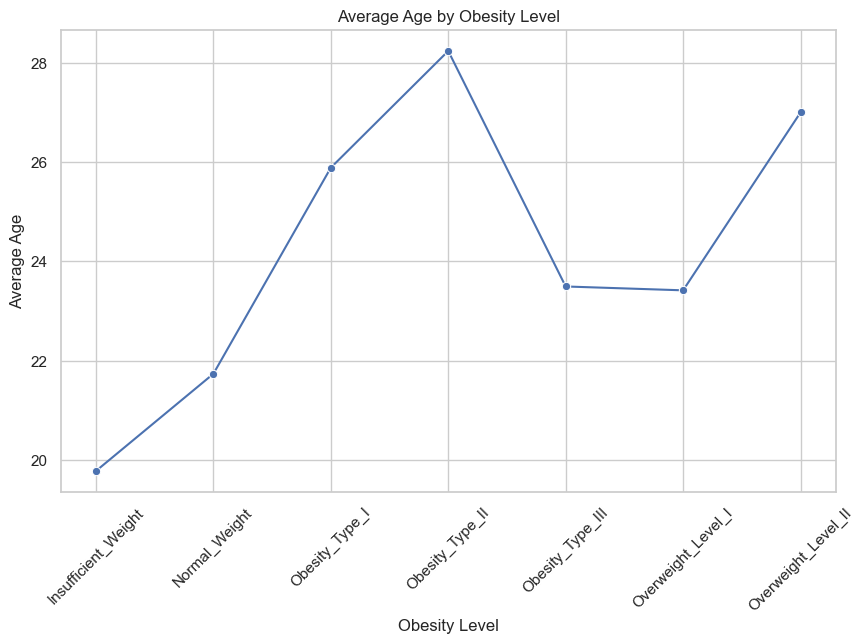

In [100]:
avg_age_by_obesity = df.groupby('Obesity_Level')['Age'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Obesity_Level', y='Age', data=avg_age_by_obesity, marker='o',palette='Set3')
plt.title('Average Age by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Average Age')

plt.xticks(rotation=45)  

plt.show()


    According to the line graph, the average age appears to be highest for people with Obesity Type II, followed by those with Obesity Type III. People with insufficient weight appear to have the lowest average age on the graph.

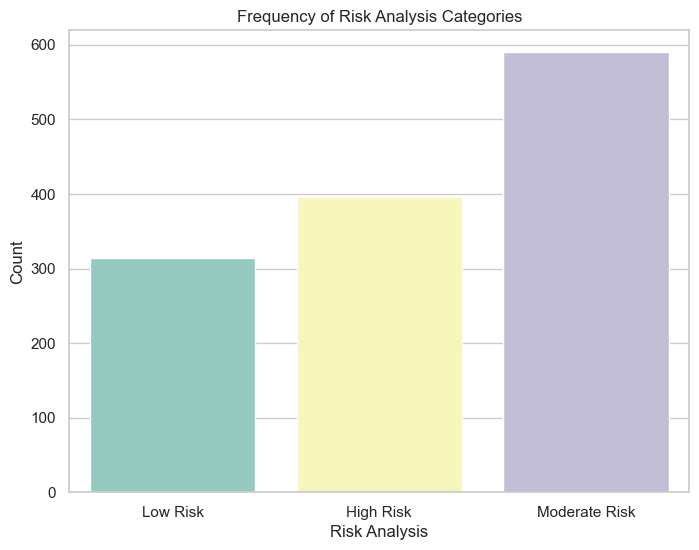

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk_Analysis', data=data, palette='Set3')
plt.title('Frequency of Risk Analysis Categories')
plt.xlabel('Risk Analysis')
plt.ylabel('Count')
plt.show()

    The graph indicates that the most frequent risk analysis category is "Moderate Risk". There are also findings in the "Low Risk" and "High Risk" categories, but less than those in the "Moderate Risk" category.

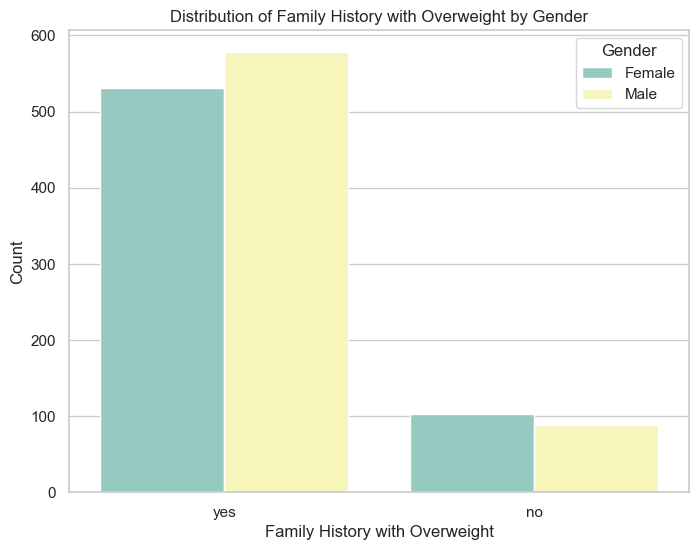

In [102]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_History', hue='Gender', data=data, palette='Set3')
plt.title('Distribution of Family History with Overweight by Gender')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.show()


    Females in the graph exhibit a higher representation and a trend towards reporting a family history of overweight, while males show lower representation and a preference towards not reporting a family history of overweight.

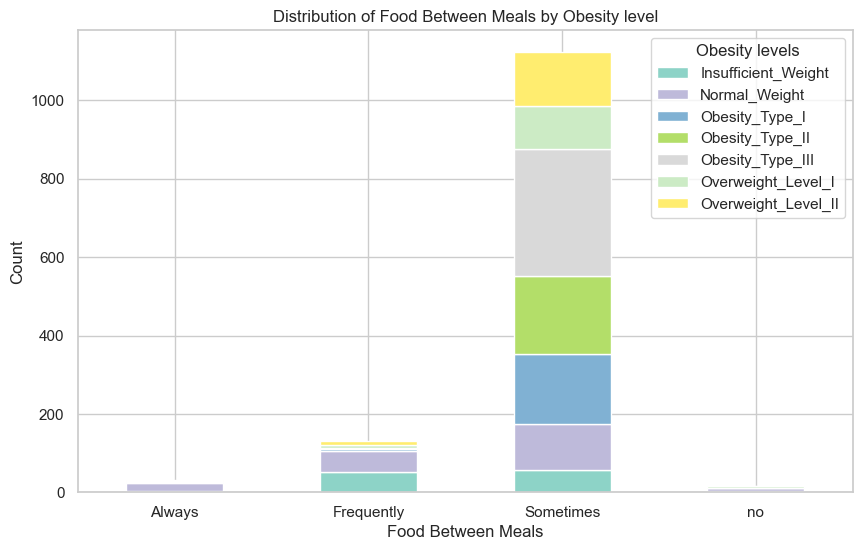

In [103]:
pivot_data = data.groupby(['Food_Between_Meals', 'Obesity_Level']).size().unstack(fill_value=0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set3')

plt.title('Distribution of Food Between Meals by Obesity level')
plt.xlabel('Food Between Meals')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity levels')

plt.show()

    People who are overweight or obese tend to eat more food between meals than people who are a healthy weight or underweight.
    People who always eat between meals tend to eat more food than people who never eat between meals.

In [104]:
from bokeh.io import output_notebook, show
output_notebook()

p = figure(title='Age vs. BMI', x_axis_label='Age', y_axis_label='BMI')

df['BMI'] = df['Weight'] / (df['Height'] ** 2)

source = ColumnDataSource(data=dict(
    age=df['Age'],
    bmi=df['BMI'],
))

p.circle('age', 'bmi', source=source)

show(p)

Loading BokehJS ...